In [4]:
from __future__ import print_function

In [6]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [7]:
import numpy as np 
np.random.seed(1337)

In [8]:
laptop=pd.read_csv("laptop_pricing.csv")

In [9]:
laptop

,Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,Dell,3,7,2.29,4,1000,0,0,15.6,39057
1,Dell,3,7,2.30,4,1000,0,0,15.6,45141
2,HP,3,7,2.30,8,256,256,0,14.0,35999
3,ASUS,3,7,2.30,4,1000,0,0,14.0,39990
4,HP,3,7,2.40,4,1000,0,0,15.6,36263
5,HP,2,4,2.30,4,500,256,0,14.0,26403
6,Lenovo,3,7,2.30,4,1000,0,0,15.6,38290
7,HP,5,8,1.60,8,1000,0,0,14.0,53554
8,Lenovo,1,3,1.80,4,1000,0,0,15.6,29990
9,Dell,3,8,3.90,4,1000,0,0,14.0,38090


In [10]:
laptop.shape

(29, 10)

In [11]:
col = [feature for feature in laptop.columns if laptop[feature].dtype == 'O']

In [12]:
for feature in col:
    labels_ordered= laptop.groupby([feature])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    laptop[feature]=laptop[feature].map(labels_ordered)

In [13]:
laptop

,Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,0,3,7,2.29,4,1000,0,0,15.6,39057
1,0,3,7,2.30,4,1000,0,0,15.6,45141
2,1,3,7,2.30,8,256,256,0,14.0,35999
3,3,3,7,2.30,4,1000,0,0,14.0,39990
4,1,3,7,2.40,4,1000,0,0,15.6,36263
5,1,2,4,2.30,4,500,256,0,14.0,26403
6,2,3,7,2.30,4,1000,0,0,15.6,38290
7,1,5,8,1.60,8,1000,0,0,14.0,53554
8,2,1,3,1.80,4,1000,0,0,15.6,29990
9,0,3,8,3.90,4,1000,0,0,14.0,38090


In [14]:
x=laptop.iloc[:,0:-1].values
y=laptop.iloc[:,-1].values

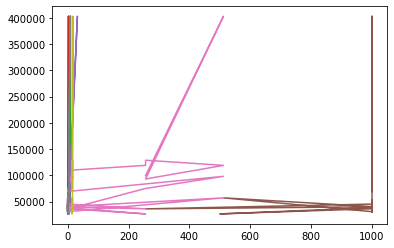

In [15]:
plt.plot(x,y)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [27]:
x_train.shape

(21, 9)

In [18]:
y_train

array([ 92990,  42590,  40338,  34890,  30690,  45141,  36263,  26403,
        35999, 128690,  39990, 118890, 118890,  35634,  99555,  97990,
        53554,  42192,  45390,  74931,  38290], dtype=int64)

In [19]:
x_test

array([[   3.  ,    7.  ,    9.  ,    2.6 ,   32.  , 1000.  ,  512.  ,
           8.  ,   17.3 ],
       [   3.  ,    5.  ,    8.  ,    1.6 ,    8.  ,  512.  ,  512.  ,
           0.  ,   15.6 ],
       [   1.  ,    3.  ,    7.  ,    2.3 ,    4.  , 1000.  ,    0.  ,
           0.  ,   14.  ],
       [   3.  ,    7.  ,    8.  ,    2.2 ,    8.  , 1000.  ,   16.  ,
           4.  ,   15.6 ],
       [   2.  ,    1.  ,    3.  ,    1.8 ,    4.  , 1000.  ,    0.  ,
           0.  ,   15.6 ],
       [   0.  ,    3.  ,    8.  ,    3.9 ,    4.  , 1000.  ,    0.  ,
           0.  ,   14.  ],
       [   1.  ,    5.  ,    9.  ,    2.4 ,    8.  , 1000.  ,    0.  ,
           4.  ,   15.6 ],
       [   0.  ,    3.  ,    7.  ,    2.29,    4.  , 1000.  ,    0.  ,
           0.  ,   15.6 ]])

In [20]:
y_test

array([402990,  56990,  33905, 109999,  29990,  38090,  69071,  39057],
      dtype=int64)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
model=lr.fit(x_train,y_train)

In [23]:
prediction = lr.predict(x_test)

In [24]:
new=[["1","5","9","2.40","8","1000","0","4","15.6"]]
prediction = model.predict(new)
prediction

C:\Users\SMILEY\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([73773.47923218])

In [25]:
model.score(x_train,y_train)

0.9796626117303885